# Hladina cholesterolu dle prostředí

* Naimportujeme knihovny.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon, norm, uniform
from scipy.stats import t, f

* Výpočet čísla datasetu.

In [2]:
K = 18
L = 11
M = (((K+L)*47) % 11)+1.
print('M = ', M)

M =  11.0


* Pro 11 bude dataset ```ex0222``` - hladina cholesterolu dle prostředí.

##  Úloha 1
> Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každou skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

* Dataset ```ex0222``` reprezentuje výsledky průzkumu ve kterém zkoumali hladinu cholesterolu u guatemalských indiánů bydlících na venkově a ve městě. 
* Sloupec ```Cholesterol``` reprezentuje hladinu cholesterolu v mg/l.
* Sloupec ```Group``` může být nebo **Urban** nebo **Rural**.

* Načteme data pomoci funkce ```read_csv()``` a podíváme se na data pomoci ```display()```.

In [3]:
df = pd.read_csv('my_data.csv', sep=';')
display(df)

,Cholesterol,Group
0,133,Urban
1,134,Urban
2,155,Urban
3,170,Urban
4,175,Urban
...,...,...
89,204,Rural
90,220,Rural
91,223,Rural
92,226,Rural


* Budeme mít dvě pozorované skupiny **Rural** a **Urban**. Celkem máme 94 záznamu. Podíváme se na počet záznamu v obou skupinách.

In [4]:
df['Group'].value_counts()

Rural    49
Urban    45
Name: Group, dtype: int64

* Počet pozorování pro skupinu Rural je 49 a pro skupinu Urban je 45
* Rozdělíme původní dataset podle příznaku Group na dvě skupiny Rural a Urban.
* Pomocí funkce ```info()``` ověříme, že sloupec **Cholesterol** má číselnou reprezentaci(není typu ```object```).

In [5]:
df_Rural = df[ df['Group']=='Rural']
df_Urban = df[ df['Group']=='Urban']

df_Rural.info()
df_Urban.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 45 to 93
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cholesterol  49 non-null     int64 
 1   Group        49 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cholesterol  45 non-null     int64 
 1   Group        45 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


### Vytvoříme pomocné funkce pro výpočet odhadu střední hodnoty, rozptylu a mediánu

* Střední hodnotu odhadneme pomocí výběrového průměru. 
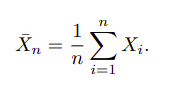

In [6]:
def SampleMean(data):
    return data['Cholesterol'].mean()

* Rozptyl odhadneme pomocí výberového rozptylu
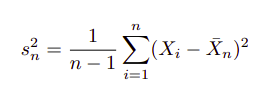

In [7]:
def SampleVariance(data):
    return data['Cholesterol'].var()

* Pomocí metody pandas ```median()``` odhadneme median

In [8]:
def SampleMedian(data):
    return data['Cholesterol'].median()

* Využijeme naše funkce na odhad střední hodnoty, rozptylu a mediánu pro skupinu **Rural**

In [9]:
print("Odhad střední hodnoty 'Cholesterolu' v Rural: ", SampleMean(df_Rural))
print("Odhad rozptylu 'Cholesterolu' v Rural: ", round(SampleVariance(df_Rural), 2)) 
print("Odhad mediany 'Cholesterolu' v Rural: ", SampleMedian(df_Rural))


Odhad střední hodnoty 'Cholesterolu' v Rural:  157.0
Odhad rozptylu 'Cholesterolu' v Rural:  1008.46
Odhad mediany 'Cholesterolu' v Rural:  152.0


* Využijeme naše funkce na odhad střední hodnoty, rozptylu a mediánu pro skupinu **Urban**

In [10]:
print("Odhad střední hodnoty 'Cholesterolu' v Urban: ", round(SampleMean(df_Urban),2))
print("Odhad rozptylu 'Cholesterolu' v Urban: ", round(SampleVariance(df_Urban),2))
print("Odhad mediany 'Cholesterolu' v Urban: ", SampleMedian(df_Urban))


Odhad střední hodnoty 'Cholesterolu' v Urban:  216.87
Odhad rozptylu 'Cholesterolu' v Urban:  1593.62
Odhad mediany 'Cholesterolu' v Urban:  206.0


## Úloha 2
> Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

* Odhad hustoty udělame pomocí histogramu. Použijeme na to metodu pandas ```plot.hist()``` a nastavimé parametr ```density=True``` aby platila normalizační podminka (škalujeme na interval <0,1>).
* Odhad distribuční funkci udělame pomocí empirické distribuční funkce. Použijeme na to taky metodu pandas ```plot.hist()``` a navic nastavimé parametr ```cumulative=True```.

<AxesSubplot:title={'center':'Odhad distribuční f-ci pro Rural'}, ylabel='Frequency'>

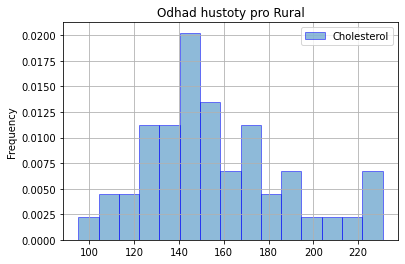

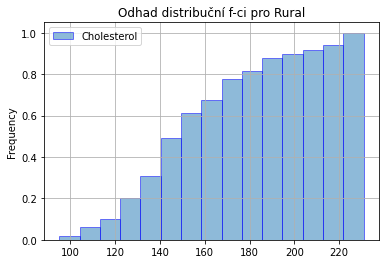

In [11]:
df_Rural.plot.hist(bins=15, grid=True, title="Odhad hustoty pro Rural", density=True, edgecolor='b', alpha=0.5)
df_Rural.plot.hist(bins=15, grid=True, title="Odhad distribuční f-ci pro Rural", density=True, cumulative=True, edgecolor='b', alpha=0.5)

<AxesSubplot:title={'center':'Odhad distribuční f-ci pro Urban'}, ylabel='Frequency'>

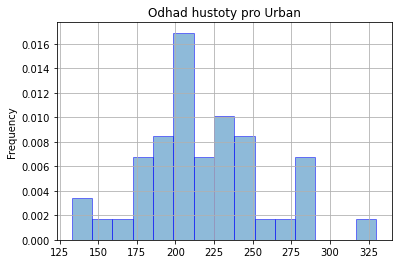

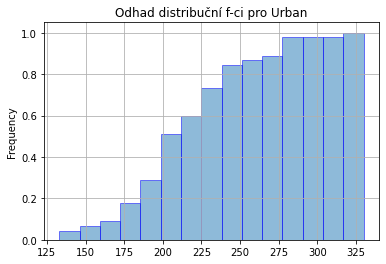

In [12]:
df_Urban.plot.hist(bins=15, legend=False, grid=True, title="Odhad hustoty pro Urban", density=True, edgecolor='b', alpha=0.5)
df_Urban.plot.hist(bins=15, legend=False, grid=True, title="Odhad distribuční f-ci pro Urban", density=True, cumulative=True, edgecolor='b', alpha=0.5)

## Úloha 3
>Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

#### Použijeme metodu **Maximální věrohodnosti** pro odhad parametrů **normalního**, **exponencíalního** a **rovnoměrého** rozdělení.

* Pro normální rozdělení odhadneme **střední hodnotu** pomocí vyběrového průměru a **rozptyl** pomicí vzorečku z přednášky: 
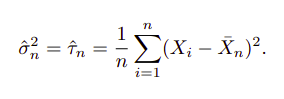
* Máme na to pomocnou funkci ```EstimateMean_Std()```

In [13]:
# Normální rozdělení
def EstimateMean_Std(data):
    my_sum = 0
    mean = SampleMean(data)
    for i in data['Cholesterol']:
        my_sum += (i-mean)**2
    my_var = my_sum/data['Cholesterol'].count()
    my_std = np.sqrt(my_var)
    return mean, my_std

* Funkce ```ExploreDeviations()``` zobrazí odhadnuté parametry všech rozdělení a nakreslí odpovídající graf. 
* Pro nakreclení grafu použiváme metody z scipy.stats ```norm.pdf()```, ```expon.pdf()``` a ```uniform.pdf()``` z přislušnými parametry. Vysledkem metody ```pdf``` je množina funkčnich hodnot pro jednotlivé rozdělení.
* Generujeme x-ové souřednicí využitím metody numpy ```linespace()``` pro jednotlivé rozdělení.


* Parametry normálního rozdělení máme vyřešené nahoře.
* **Lambdu**, jako parametr exponenciálního rozdělení, najdeme **1/střední hodnota**, což plyné ze vzorcu:
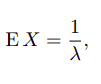
* Parametry **a** a **b** pro Rovnoměrné rozdělení najdeme jako krajní body intervalu pozorovaných dat

In [14]:
def ExploreDeviations(data, name):
    f, ax  = plt.subplots(figsize = (8, 6))
    ax.hist(data["Cholesterol"], bins=15, density=True, alpha = 0.5, edgecolor='b')
    ax.set_title("Rozdělení - " + name)

    x = np.linspace(data['Cholesterol'].min()-10, data['Cholesterol'].max()+10, 100)

    #Normální rozdělení
    mean, std = EstimateMean_Std(data)
    print("Normální rozdělení: ")
    print("\tMaximálne věrohodný odhad střední hodnoty -> ", mean)
    print("\tMaximálne věrohodný odhad rozptylu -> ", std.round(2), "\n")
    y_norm = norm.pdf(x, mean, std)
    ax.plot(x, y_norm, color = 'r', label = "Normální rozdělení")
    
    #Exp. rozdělení
    my_lambda = 1/mean
    print("Exponenciální rozdělení: ")
    print("\tlambda :", round(my_lambda, 4), "\n")
    y_exp = expon.pdf(x, scale = mean)
    ax.plot(x, y_exp, color = 'g', label = "Exponenciální rozdělení")
    
    #Rovnoměrné rozdělení
    a = data['Cholesterol'].min()
    b = data['Cholesterol'].max()
    print("Rovnoměrné rozdělení: ")
    print("\ta :", a)
    print("\tb :", b)
    y_unif = uniform.pdf(x, a, b - a)
    ax.plot(x, y_unif, color = 'orange', label = "Rovnoměrné rozdělení")
    
    ax.legend()

* Zavoláme funkci ```ExploreDeviations()``` pro skupinu **Rural**

Normální rozdělení: 
	Maximálne věrohodný odhad střední hodnoty ->  157.0
	Maximálne věrohodný odhad rozptylu ->  31.43 

Exponenciální rozdělení: 
	lambda : 0.0064 

Rovnoměrné rozdělení: 
	a : 95
	b : 231


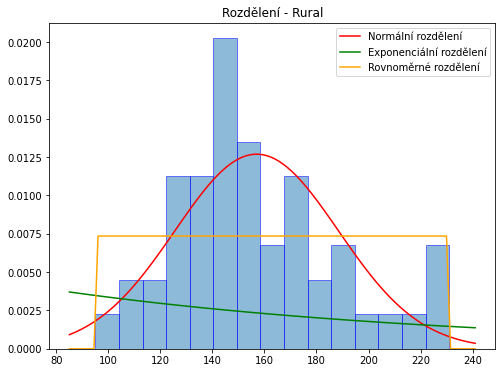

In [15]:
ExploreDeviations(df_Rural, 'Rural')

* Z grafu si můžeme všimnout, že **normální rozdělení** co nejlépe popisuje skupinu dat **Rural**.


* Teď zavoláme funkci ```ExploreDeviations()``` pro skupinu **Urban**

Normální rozdělení: 
	Maximálne věrohodný odhad střední hodnoty ->  216.86666666666667
	Maximálne věrohodný odhad rozptylu ->  39.47 

Exponenciální rozdělení: 
	lambda : 0.0046 

Rovnoměrné rozdělení: 
	a : 133
	b : 330


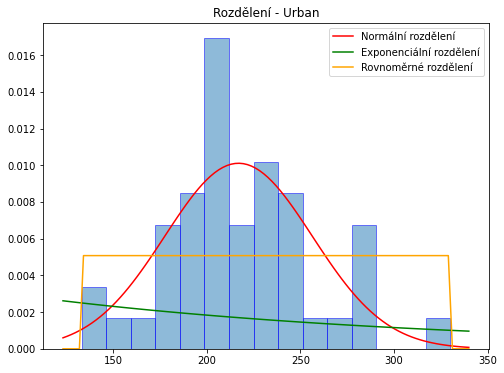

In [16]:
ExploreDeviations(df_Urban, 'Urban')

* Stejným způsobem si můžeme všimnout, že **normální rozdělení** takt co nejlépe popisuje skupinu dat **Urban**.

## ÚLOHA 4
>Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

* Ve funkci ```Simulation()``` generujeme náhodný výběr o 100 hodnotách z **normálního rozdělení**, jehož parametry použiváme z predchozího bodu.
* Pro zobrazení simulovanáných dat postupujeme stejně jako pro původní data v předchozím bodě.
* Dále kreslíme původní histogram pro **normální rozdělení** a histogram pro **simulovaná data**.  

In [17]:
def Simulation(data, name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14,7), sharey = True)
    mean, std = EstimateMean_Std(data)
    sim_data = np.random.normal(mean, std, 100)
    
    ax1.hist(data["Cholesterol"], bins=15, density=True, alpha = 0.5, edgecolor='b')
    ax1.set_title("Rozdělení původních dat - " + name)

    x = np.linspace(data['Cholesterol'].min()-10, data['Cholesterol'].max()+10, 100)
    x_sim = np.linspace(sim_data.min()-10, sim_data.max()+10, 100)

    y_norm = norm.pdf(x, mean, std)
    y_norm_sim = norm.pdf(x_sim, mean, std)
    ax1.plot(x, y_norm, color = 'r')
    
    ax2.set_title("Rozdělení simulovaných dat - " + name)
    ax2.hist(sim_data, bins=15, density=True, alpha = 0.5, edgecolor='b')
    ax2.plot(x_sim, y_norm_sim, color = 'r')

* Zavoláme funkci ```Simulation()``` pro skupinu **Rural**

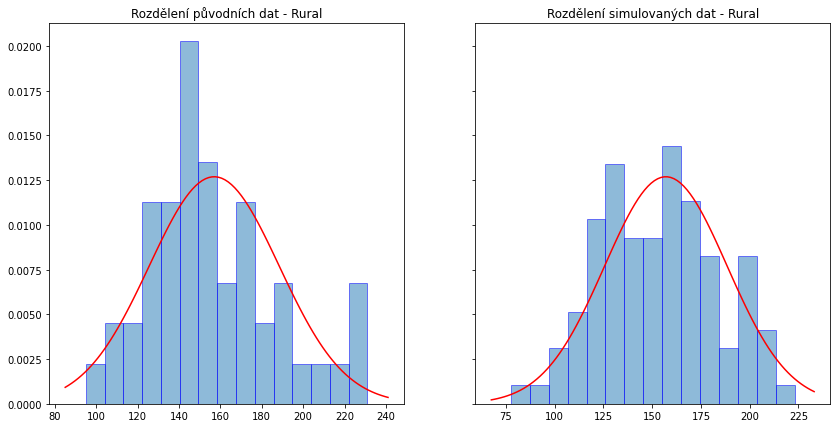

In [18]:
Simulation(df_Rural, 'Rural')

* Z porovnání histogramu můžeme jistě řict, že data skupiny **Rural** odpovidají normálnímu rozdělení.


* Teď zavoláme funkci ```Simulation()``` pro skupinu **Urban**

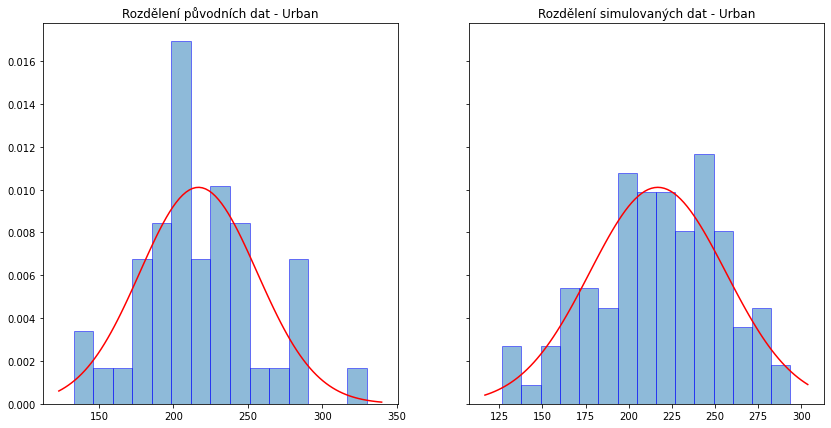

In [19]:
Simulation(df_Urban, 'Urban')

* Z porovnání histogramu můžeme jistě řict, že data skupiny **Urban** taky odpovidají normálnímu rozdělení.

## ÚLOHA 5
>Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.


* Vytvoříme pomocnou funkci pro výpočet **výběrové směrodatné odchylky**, využitim metody pandas ```std()```, která fnguje podle vzorečku 
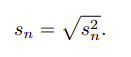

In [20]:
def SampleStd(data):
    return data['Cholesterol'].std()

* Z důvodu, že neznáme rozptzyl budeme použivat **Studentovo t-rozdělení**.
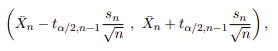
* **Alpha** v našem připadě **je 0.05**  <= `1 - alpha = 0.95`
* Metoda z scipu.stats ```t.isf()``` vratí nam kritickou hodnotu podle tabulky.
* Použitím vzorečku shora, funkce ```ConfInterval()``` vratí oboustranný 95% konfidenční interval pro střední hodnotu.

In [21]:
def ConfInterval(data, alpha):
    mean = SampleMean(data)
    std = SampleStd(data)
    n = data['Cholesterol'].count()
    critical_val = t.isf(alpha / 2, df = n - 1)
    return (mean - (critical_val * std)/np.sqrt(n) , mean + (critical_val * std)/np.sqrt(n))    

* Tohle je funkce, která vykreslí konfidenční interval pro střední hodnotu.

In [22]:
def DisplayInterval(interval, data, name):
    print("Konfidenční interval: (", round(interval[0], 2), ",", round(interval[1], 2), ")")
    
    f, ax  = plt.subplots(figsize = (8, 6))
    ax.hist(data["Cholesterol"], bins=15, density=True, alpha = 0.5, edgecolor='b')
    ax.set_title("Zobrazení konfidenčního intervalu - " + name)
    ax.axvline(x = interval[0], color = 'r', linestyle = '--')
    ax.axvline(x = interval[1], color = 'r', linestyle = '--')
    

* Spočteme a nakreslíme oboustranný 95% konfidenční interval pro střední hodnotu pro skupinu **Rural**

Konfidenční interval: ( 147.88 , 166.12 )


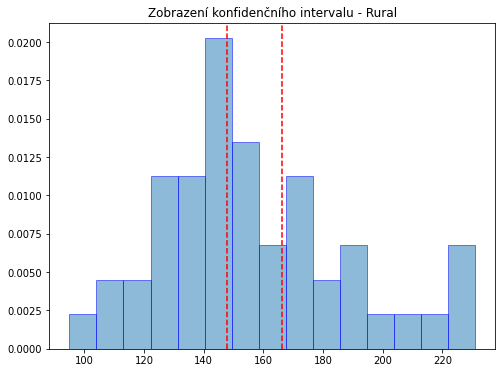

In [23]:
interval = ConfInterval(df_Rural, 0.05)
DisplayInterval(interval, df_Rural, 'Rural')

* Stejným spůsobem spočteme a nakreslíme oboustranný 95% konfidenční interval pro střední hodnotu pro skupinu **Urban**

Konfidenční interval: ( 204.87 , 228.86 )


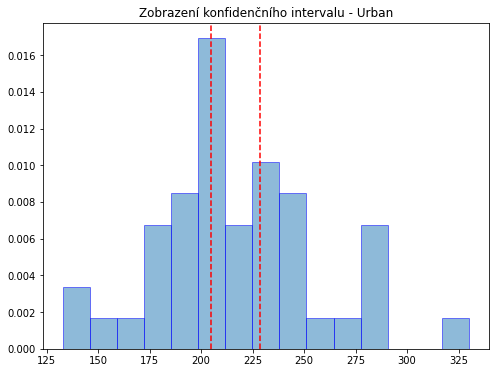

In [24]:
interval = ConfInterval(df_Urban, 0.05)
DisplayInterval(interval, df_Urban, 'Urban')

## ÚLOHA 6
> Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

* **Pro testování** na hladině významnosti 5 % hypotézy (zda je střední hodnota rovná hodnotě K), **použiváme interval z předchozího bodu**.
* Leží-li hodnota K v konfidenčním intervalu, pak platí nůlová hypotéza (střední hodnota rovná hodnotě K). V opačném připadě zamítnemé nůlovou hypotézu ve prospěch alternativy.

In [25]:
def IsInInterval(data, K):
    print("\tNůlová hypotéza: K (", K, ") se rovná střední hodnotě (", round(SampleMean(data), 2), ") na hladině významnosti 5%")
    print("\tAlternativní hypotéza: K se nerovná střední hodnotě na hladině významnosti 5%\n")
    interval = ConfInterval(data, 0.05)
    if (K >= interval[0]) and (K <= interval [1]):
        print("\tNezamítamé nůlovou hypotézu.")
    else:
        print("\tZamítamé nůlovou hypotézu ve prospěch alternativy.")

In [26]:
print("Pro skupinu 'Rural': ")
IsInInterval(df_Rural, K)

Pro skupinu 'Rural': 
	Nůlová hypotéza: K ( 18 ) se rovná střední hodnotě ( 157.0 ) na hladině významnosti 5%
	Alternativní hypotéza: K se nerovná střední hodnotě na hladině významnosti 5%

	Zamítamé nůlovou hypotézu ve prospěch alternativy.


In [27]:
print("Pro skupinu 'Urban': ")
IsInInterval(df_Urban, K)

Pro skupinu 'Urban': 
	Nůlová hypotéza: K ( 18 ) se rovná střední hodnotě ( 216.87 ) na hladině významnosti 5%
	Alternativní hypotéza: K se nerovná střední hodnotě na hladině významnosti 5%

	Zamítamé nůlovou hypotézu ve prospěch alternativy.


### ÚLOHA 7
>Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

* Pro řešení této úlohy použijeme **dvouvýběrový t-test**.


* Ale nejprvé si musíme prozkoumat rovnost rzptylů dvou skupin. 
* Naštěsti naše data pocházi z normálního rozdělení, proto můžeme využit **F-test** pro ověření shodnosti rozptylů.
* Pomocí funkce z knihovny scipy `f.cdf()` provedeme F-test. Na zakladě výsledného p-value rozhodneme o shodnosti rozptylů. Pokud **p-value bude větší než alpha(0.05) zamítneme nůlovou hypotézu** o shodnosti rozptylů.

In [28]:
var_Rural = SampleVariance(df_Rural)
var_Urban = SampleVariance(df_Urban)
alpha = 0.05

F = var_Rural/var_Urban
df1 = df_Rural['Cholesterol'].count() - 1
df2 = df_Urban['Cholesterol'].count() - 1

p_value = f.cdf(F, df1, df2)
print("p-value F testu: ", p_value.round(3))
if p_value > alpha:
    print("Zamítamé nůlovou hypotézu o shodosti rozptylů")
else:
    print("Nezamítamé nůlovou hypotézu o shodosti rozptylů")

p-value F testu:  0.061
Zamítamé nůlovou hypotézu o shodosti rozptylů


* V připadě neshodnosti rozptylů, poůživáme dvouvýběrovy t-test pro připad nerovnosti rozptylů.
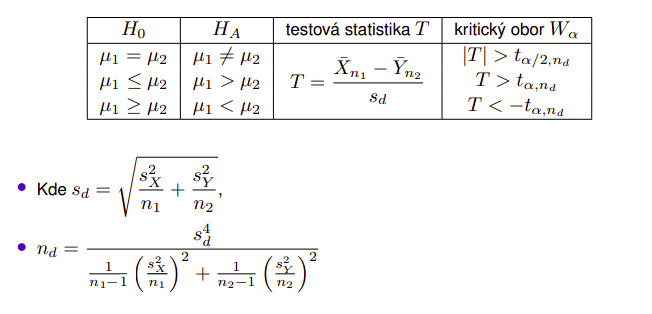

In [29]:
print("Nůlová hypotéza: ", SampleMean(df_Rural), " = ", round(SampleMean(df_Urban), 2))

Nůlová hypotéza:  157.0  =  216.87


In [30]:
n1 = df_Rural['Cholesterol'].count()
n2 = df_Urban['Cholesterol'].count()
var_Urban/n2

s_d = np.sqrt(var_Rural/n1 + var_Urban/n2)
n_d = (s_d**4)/( (1/(n1-1)) * (var_Rural/n1)**2  + (1/(n2-1)) * (var_Urban/n2)**2 )

t_critical_val = t.isf(alpha/2, df = n_d)
print("Critical value t = ", round(t_critical_val, 5))

T = (SampleMean(df_Rural) - SampleMean(df_Urban))/s_d
print("|T| = ", round(abs(T), 5), "\n")

if (abs(T) > t_critical_val):
    print(round(abs(T), 5), " > ", round(t_critical_val, 5))
    print("Zamítame nůlovou hypotézu o shodnosti průměrů dvou testovacích skupin.")
else: 
    print(round(abs(T), 5), " < ", round(t_critical_val, 5))
    print("Nezamítame nůlovou hypotézu o shodnosti průměrů dvou testovacích skupin.")
    

Critical value t =  1.98861
|T| =  8.00041 

8.00041  >  1.98861
Zamítame nůlovou hypotézu o shodnosti průměrů dvou testovacích skupin.
